## ASWATHI AJITH

### TASK - 4


### Bucket FICO scores

This task focuses on transforming FICO scores (ranging from 300 to 850) into buckets (categories) to be used in a machine learning model for predicting probability of default (PD). Since Charlie's model requires categorical inputs, we need a systematic approach to create these buckets.



FICO scores are continuous values, but Charlie’s model requires categorical inputs.
Instead of treating each unique FICO score as a separate category, we group them into buckets based on credit risk.

The process of dividing continuous data into discrete categories is called quantization.
We want to find the best way to group FICO scores into a fixed number of buckets without losing too much information.

The buckets should be meaningful—they should reflect the likelihood of default.
We can optimize for:

Mean Squared Error (MSE): Ensuring that scores in the same bucket are close to each other. Ensures that similar FICO scores are grouped together while keeping the overall error low.

Log-Likelihood: Making sure that buckets reflect actual default probabilities.This method optimizes the buckets based on how well they predict default risk. This approach ensures that buckets maximize separation between high- and low-risk borrowers.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
fico_df = pd.read_csv("Downloads/Task 3 and 4_Loan_Data.csv")
fico_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [3]:
num_buckets = 10
fico_df['bucket'] = pd.cut(fico_df['fico_score'], bins = num_buckets, labels= False )
fico_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,bucket
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,4
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,3
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,4
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,4
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,6
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,4
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,4
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5


#### Initializing the log-likelihood function

ki is the number of defaults.

ni is the total number of customers.

pi is the probability of default.

In [4]:

def calculate_log_likelihood(fico_df):
    log_likelihood = 0
    for b in range(fico_df['bucket'].nunique()):
        bucket_data = fico_df[fico_df['bucket'] == b]
        ni = len(bucket_data)
        ki = bucket_data['default'].sum()
        if ni > 0 and 0 < ki < ni:  
            pi = ki / ni
            log_likelihood += binom.logpmf(ki, ni, pi)
    return log_likelihood

In [5]:
initial_log_likelihood = calculate_log_likelihood(fico_df)
print("Initial bucket value", initial_log_likelihood)

Initial bucket value -27.110121842193227


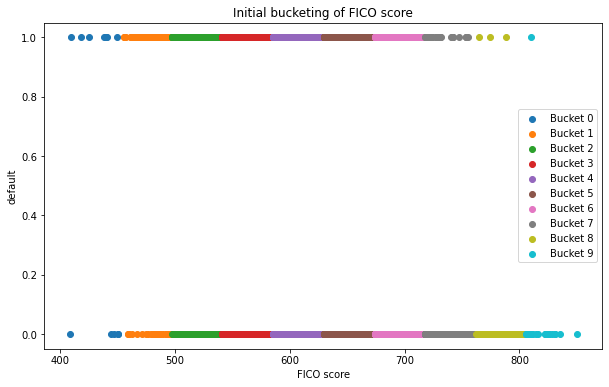

In [6]:
plt.figure(figsize=(10,6))
for b in range(num_buckets):
        bucket_value = fico_df[fico_df['bucket'] == b]
        plt.scatter(bucket_value['fico_score'],bucket_value['default'], label = f"Bucket {b}" )
plt.xlabel("FICO score")
plt.ylabel("default")
plt.title("Initial bucketing of FICO score")
plt.legend()
plt.show()

#### Bucket optimization

In [7]:
# Now, instead of arbitarily choosing the num_buckets we should optimize it
from sklearn.cluster import KMeans
num_buckets = 10
fico_scores = fico_df['fico_score'].values.reshape(-1, 1)  
kmeans = KMeans(n_clusters = num_buckets, random_state = 43 )
fico_df['kmeans_buckets'] = kmeans.fit_predict(fico_scores)
# print(len(fico_df[fico_df['kmeans_buckets']==9]))

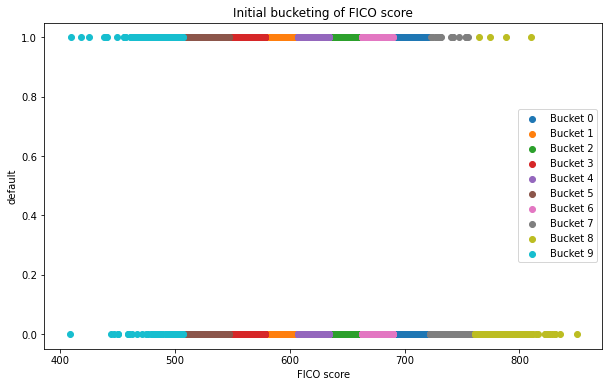

In [8]:
plt.figure(figsize=(10,6))
for b in range(num_buckets):
        bucket_value = fico_df[fico_df['kmeans_buckets'] == b]
        plt.scatter(bucket_value['fico_score'],bucket_value['default'], label = f"Bucket {b}" )
plt.xlabel("FICO score")
plt.ylabel("default")
plt.title("Initial bucketing of FICO score")
plt.legend()
plt.show()